In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import unidecode

In [10]:
df_clarin = pd.read_csv('tools/big_clarin.csv')
df_destape = pd.read_csv('tools/eldestapeweb.csv')
stopwords = pd.read_csv('tools/stopwords.csv', header= None)


In [11]:
df_clarin = df_clarin[pd.notnull(df_clarin['articleBody'])]
df_destape = df_destape[pd.notnull(df_destape['articleBody'])]

In [12]:
df_destape.head()

,articleBody,bajada,headline,link,section,source,volanta
0,La ex presidenta y candidata a senadora de Uni...,La ex presidenta y candidata a senadora de Uni...,El cantito contra Clarín en medio del discurso...,http://www.eldestapeweb.com//el-fuerte-pedido-...,Política,eldestapeweb,Elecciones 2017
1,Durante el discurso de la candidata a senadora...,Un fuerte repudio contra el grupo de medios má...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-cantito-contra...,Política,eldestapeweb,Elecciones 2017
2,Tras las elecciones legislativas de la semana ...,Crecen los rumores en torno a la posible desvi...,ESCÁNDALO | Empresario clave reveló el porcent...,http://www.eldestapeweb.com//macri-ya-tendria-...,Política,eldestapeweb,Macri Presidente
3,Con un encendido discurso que apuntó a interpe...,La candidata a senadora cerró su campaña de ca...,"El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//las-10-frases-mas...,Política,eldestapeweb,Elecciones 2017
4,Con un encendido discurso que apuntó a interpe...,"En medio de su discurso, la candidata a senado...","El fuerte pedido de Cristina por Maldonado: ""T...",http://www.eldestapeweb.com//el-calculo-matema...,Política,eldestapeweb,Elecciones 2017


In [13]:
stopwords_list = stopwords[0].values
stopwords_list = list(stopwords_list)

In [14]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [15]:
def text_stemmer(text):
    texto = text.lower()
    unaccented_string = unidecode.unidecode(texto)
    stripped = re.sub('[^a-z0-9]+', ' ', unaccented_string).lstrip()
    stemmed = " ".join([stemmer.stem(x) for x in stripped.split(' ')])
    return stemmed

In [16]:
#Esto tarda bastante
df_clarin['articleBody2'] = df_clarin["articleBody"].apply(text_stemmer)
df_destape['articleBody2'] = df_destape["articleBody"].apply(text_stemmer)

In [17]:
df_clarin.head(5)

,Unnamed: 0,articleBody,bajada,date,headline,section,volanta,articleBody2
0,0,Argentina XV ratificó la supremacía que ejerce...,"Cerró la temporada con una goleada, 82-7 a Uru...",2017-10-15 18:32:35.075360,Argentina XV se consagró bicampeón,Deportes,Rugby,argentin xv ratif la supremaci que ejerc en el...
1,1,En un informe de Transparencia Internacional -...,Un buen gobierno necesita participación activa...,2017-10-15 18:32:35.075360,De súbditos a ciudadanos,Opinión,Del editor al lector,en un inform de transparent internacional cuy ...
2,2,Instituto ratificó su liderazgo en el Grupo B ...,Superaron a Quimsa y a Olímpico respectivamente.,2017-10-15 18:32:35.075360,Súper 20: ganaron Instituto y Atenas,Deportes,Básquet,institut ratif su liderazg en el grup b del su...
3,3,"En un raid por dos programas de TV, el último ...",Estuvo en los programas de Jorge Lanata y Luis...,2017-10-15 18:32:35.075360,El raid televisivo de Elisa Carrió en el últim...,Política,Elecciones 2017,en un raid por dos program de tv el ultim domi...
4,4,"A una semana exacta de las elecciones, la gobe...","La gobernadora criticó al kirchnerismo: ""Duran...",2017-10-15 18:32:35.075360,"María Eugenia Vidal: ""No se puede joder con lo...",Política,A una semana de las elecciones,a una seman exact de las eleccion la gobern bo...


In [23]:
df = pd.concat([df_clarin,df_destape])
#df_clarin.info(), df_destape.info(), df.info()

In [27]:
#df_section = df[(df.section == 'Política') | (df.section == 'Economía')]
X = df['articleBody2']
y = df['diario']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [7]:
#Vectorizar 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents= 'ascii', stop_words= stopwords_list)
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train)

X_train_counts.shape

NameError: name 'stopwords_list' is not defined

In [8]:
#frecuencia por palabra
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#tfidf_transformer.fit(X_train_counts)
#X_train_tfidf = tfidf_transformer.transform(X_train_counts)

#X_train_tfidf.shape

In [9]:
X_test_counts = count_vect.transform(X_test)
#X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_train

NameError: name 'count_vect' is not defined

### Multinomial Naive Bayes

In [32]:
model_multinb = MultinomialNB().fit(X_train_counts, y_train)
y_pred_multinb = model_multinb.predict(X_test_counts)

print('Accuracy Multi NB: ',accuracy_score(y_pred_multinb, y_test))

Accuracy Multi NB:  0.91095890411


In [34]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_multinb
df_results.head(10)

,articleBody2,Prediction
306,el ex ministr de educacion esteb bullrich come...,destape
929,el conductor joaquin poll alvarez hiz una fuer...,clarin
899,el luchador de ufc jeremy stephens se aguant c...,destape
1830,com una imag pued dispar recuerd olor sensacio...,clarin
1413,carac abril de 2017 el vagon de subt tan abarr...,clarin
928,esta tard marcel tinayr debut com conductor de...,destape
280,el period fern niembr fue candidat a diput por...,clarin
2019,la posibil de ten un metrobus que llev previsi...,clarin
1106,te respond lo que quier si me habl asi tan bon...,clarin
269,la famili de santiag maldon tuv que sal a desa...,destape


### KNN

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_counts,y_train)
y_pred_knn = model_knn.predict(X_test_counts)
print('Accuracy KNN: ',accuracy_score(y_pred_knn, y_test))

Accuracy KNN:  0.756360078278


In [37]:
# Calculamos nuevamente los scores de cross validation, pero esta vez sobre los features estandarizados
X_counts = count_vect.transform(X)
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model_knn, X_counts, y, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [38]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,n_neighbours,score_medio,score_std
0,1,0.747091,0.024090
1,6,0.784551,0.020796
2,11,0.751610,0.027327
3,16,0.760975,0.026930
4,21,0.747730,0.027024


In [39]:
# Armamos nuevamente los límites para graficar
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']

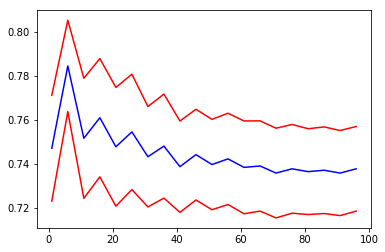

In [40]:
# Buscamos gráficamente el valor ópitmo para n_neighbors
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

### SVM

In [ ]:
svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]
for c in svc_C:
    for g in svc_gamma:
        model_svm = SVC(kernel='rbf', class_weight='balanced', C=c, gamma = g)
        print (np.mean(cross_val_score(model_svm,X_train_counts,y_train,cv=5)),' gamma:',g,' C:',c)

In [42]:
model_svm = SVC(kernel='rbf', class_weight='balanced', C=50, gamma = 0.0001)
model_svm.fit(X_train_counts,y_train)
y_pred_svm = model_svm.predict(X_test_counts)
print('Accuracy SVM: ',accuracy_score(y_pred_svm, y_test))

Accuracy SVM:  0.954990215264


### Regresión Logística

In [43]:
model_log = LogisticRegression(C=0.1)
model_log.fit(X_train_counts, y_train)
y_pred_log = model_log.predict(X_test_counts)
print('Accuracy Logistic Regression: ',accuracy_score(y_pred_log, y_test))

Accuracy Logistic Regression:  0.955968688845


In [44]:
df_results = pd.DataFrame(X_test)
df_results['Prediction'] = y_pred_log
df_results.head(10)

,articleBody2,Prediction
306,el ex ministr de educacion esteb bullrich come...,destape
929,el conductor joaquin poll alvarez hiz una fuer...,destape
899,el luchador de ufc jeremy stephens se aguant c...,destape
1830,com una imag pued dispar recuerd olor sensacio...,clarin
1413,carac abril de 2017 el vagon de subt tan abarr...,clarin
928,esta tard marcel tinayr debut com conductor de...,clarin
280,el period fern niembr fue candidat a diput por...,destape
2019,la posibil de ten un metrobus que llev previsi...,clarin
1106,te respond lo que quier si me habl asi tan bon...,clarin
269,la famili de santiag maldon tuv que sal a desa...,destape
